# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [34]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'c88e53c1-d877-470d-97fe-39cf4a13610e'
resource_group = 'potato'
workspace_name = 'tomato'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='police-stop-search')
df = dataset.to_pandas_dataframe()
df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2016-10-01T13:16:00+00:00,None,None,None,None,Male,18-24,Black or Black British - African (B2),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Offender given drugs possession warning,True,False
1,Person search,2016-10-01T22:30:00+00:00,None,None,None,None,Male,25-34,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,None,False
2,Person and Vehicle search,2016-10-02T00:15:00+00:00,None,None,None,None,Male,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect summonsed to court,False,False
3,Person and Vehicle search,2016-10-02T00:15:00+00:00,None,None,None,None,Female,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,None,False
4,Person and Vehicle search,2016-10-04T13:05:00+00:00,None,None,None,None,Male,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect arrested,True,False


### Q. Define the problem domain

In [ ]:
# ENGLISH not Python
# Diagnosis is an ideal label column because it is the result
# useful for a doctor to speed up the diagnosis process. 

### Q. Identify candidate questions for your machine learning project

In [ ]:
# value_counts
# discrete or continuous numbers
# what is label, what columns should be evaluated to become 
# features, Dimensions, Variables
# 
# can i use the dataset as-is or does it need cleaning?



### Q. Generate a descriptive statistics report for the columns in your dataset

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [35]:
print(df.shape)
df.head()

(4679, 15)


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2016-10-01T13:16:00+00:00,None,None,None,None,Male,18-24,Black or Black British - African (B2),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Offender given drugs possession warning,True,False
1,Person search,2016-10-01T22:30:00+00:00,None,None,None,None,Male,25-34,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,None,False
2,Person and Vehicle search,2016-10-02T00:15:00+00:00,None,None,None,None,Male,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect summonsed to court,False,False
3,Person and Vehicle search,2016-10-02T00:15:00+00:00,None,None,None,None,Female,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,None,False
4,Person and Vehicle search,2016-10-04T13:05:00+00:00,None,None,None,None,Male,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect arrested,True,False


In [36]:
df.columns

features = ['Type', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome linked to object of search',
       'Removal of more than just outer clothing']

In [44]:
x = df.loc[:, features]
y = df.loc[:, 'Outcome']
x.dropna(inplace=True)
y = y.iloc[x.index]
print(x.shape)
print(y.shape)
x.head()

(3789, 9)
(3789,)


,Type,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,Male,18-24,Black or Black British - African (B2),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,True,False
2,Person and Vehicle search,Male,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,False,False
4,Person and Vehicle search,Male,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,True,False
7,Person search,Female,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,True,False
8,Person search,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,False,False


In [45]:
from sklearn.preprocessing import LabelEncoder 

for col in x.columns:
    le = LabelEncoder()
    x[col]= le.fit_transform(x[col])
    
x.head()


,Type,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome linked to object of search,Removal of more than just outer clothing
0,1,2,1,9,4,4,3,2,0
2,0,2,1,9,1,4,3,0,0
4,0,2,1,29,4,4,3,2,0
7,1,0,4,32,4,5,11,2,0
8,1,2,2,32,4,5,11,0,0


Q. Is there any correlation in the data? How would you decide which columns to keep?

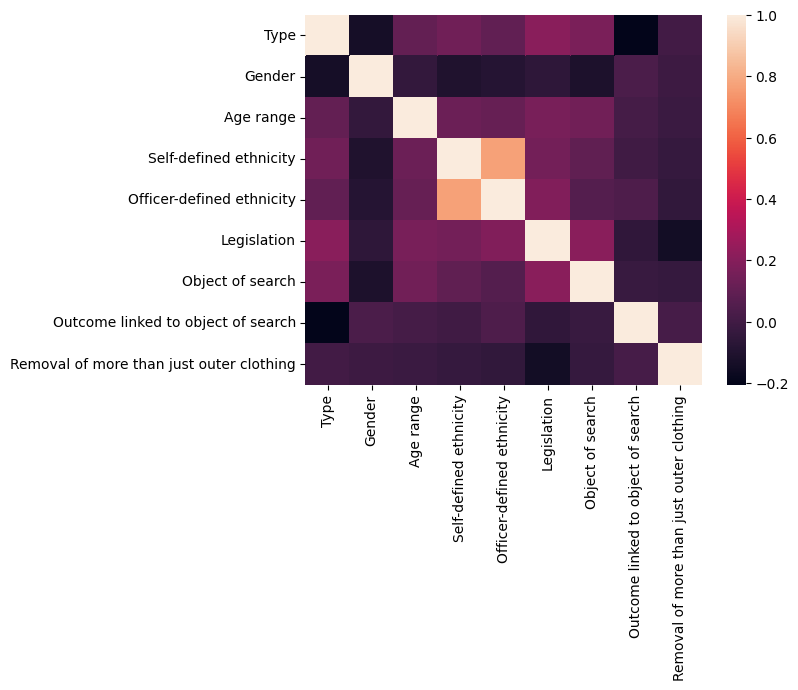

In [40]:
# SEABORN and data.corr() to plot a heatmap
# Github-> DFE6
corr = x.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.heatmap(corr)
plt.show()

Q. Is there any imbalance in the label
?

In [46]:
#print(dict(y.value_counts()).keys())
print('*************')
all_label_values = list(dict(y.value_counts()).keys())
logic = lambda x: 0 if (x == all_label_values[0] or x== all_label_values[1]) else 1
y2 = y.map(logic)
y2[:10]

*************


0     1
2     1
4     1
7     1
8     1
9     1
13    1
14    1
17    1
18    1
Name: Outcome, dtype: int64

In [ ]:
# Approach 1-> filter out and select ONLY the top 2 classes!
# Approach 2-> bundle all the weaker classes together as a SINGLE class

Q. Are there any outliers in the dataset? What do you do with them?

In [ ]:
# OPTIONAL
# Z-Score
# check for values >3 and <-3
# What do i do with them?
# 1) Remove them 
# 2) replace all >3 with max, <-3 with min
# 3) Ignore

# Detecting Frauds, Anomalies 

Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [ ]:
# if you are not sure, do label ENCODING
# unique_values = data['diagnosis'].value_counts()
# Form a dictionary of the unique values!
# encoding_funk = lambda x : dictionary[x]
# data['my_string_column'] = data['my_string_column'].apply(encoding_funk)

In [ ]:
# One hot encoding-> pandas-> get_dummies 

# data['diagnosis'] - get_dummies


# if there are too many values-> one-hot encoding is NOT an option

# GROUP_BY on ZIP_code or country or state!
# or del that column altogether!

# One Hot encoding

# Sales City Profit
#  100.  London  20
#. 100.  Papua.  60
#  123.  London. 21
#. 65.   Paris.  13
#. 92.   Bandar Seri Begawan 22

# 2 kinds of ML problems- 
# 1) i can use city as a filter and generate multiple models
# one for each city

# 2) Or make a model that is GENERALIZED for each city and impacted
# equally by each city

# result of one hot encoding
# Sales City_London City_Papua City_Paris City_BSB Profit
#  100.  1            0         0          0          20
#. 100.  0            1         0           0      .  60
#  123.  1.            0         0          0         21
#. 65.   0             0         1          0      .  13
#. 92.   0            0          0          1         22




# final ml equation
# profit -> label
# features-> [ 'Sales', 'Cit....']
# profit=w1*Sales+w2*C_Lon+w3*C_Pap+w4*C_Par+w5*City_BSB + bias

# Sales from london
# 20=w1*100 + w2*1+ w3*0+ w4*0+ w5*0 + bias
# 21=w1*123 + w2*1+ w3*0+ w4*0+ w5*0 + bias

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y2,
                             test_size=0.2, random_state=42)

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [50]:
# for loop b/w all your models

# xtrain,xtest, ytrain,ytest = train_test_split

# model.fit-> xTRAIN , xTEST
# predictions = model.predict(xtest)
# accuracy_score/rmse/mae/precision for (predictions, ytest)

# MAJOR-> string/ranges values-> convert into numbers
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
# HYPERPARAMETERS-> these are 2 diff HPs for Random Forest 
# SAME algo could also give 2 diff models!
ntree1, ntree2 = 50,100
from sklearn.metrics import accuracy_score
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC()]:
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  print(accuracy_score(predictions, ytest))


0.8298153034300791
0.8364116094986808
0.8311345646437994
0.8258575197889182
0.8192612137203166
0.8179419525065963


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [52]:
# Based on Accuracy, Naive Bayes is based selection

from sklearn.naive_bayes import GaussianNB
final_model = GaussianNB()
final_model.fit(xtrain,ytrain)
p = final_model.predict(xtest)
print(accuracy_score(p, ytest))

0.8311345646437994


In [54]:
from joblib import dump
dump(final_model, 'filename.joblib') 

['filename.joblib']

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [ ]:
# EXPORT your model and upload to azure
# deploy to Azure Container Instance
# after 20-30 mins, consume tab will appear in your ENDPOINT
# and then paste the PYTHON code below!

In [56]:
import sklearn
sklearn.__version__

'0.24.2'

In [ ]:
# PASTE Consume code here